In [3]:
from quantile_regression.unconstrained_optimal_transport import UnconstrainedOTQuantileRegression
from old_source_code.data import create_joint_x_y
from utils import TrainParams
import torch

X, Y = create_joint_x_y(1000)
X_dataset = torch.from_numpy(X)
Y_dataset = torch.from_numpy(Y)
device_and_dtype_specifications = dict(
    dtype=torch.float64,
    device=torch.device("cpu")
)

X_dataset = X_dataset.to(**device_and_dtype_specifications)
Y_dataset = Y_dataset.to(**device_and_dtype_specifications)

dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_dataset, Y_dataset), batch_size=256, shuffle=True)
train_params = TrainParams(num_epochs=500, learning_rate=1e-2, verbose=True)

uotqr = UnconstrainedOTQuantileRegression(
    alpha=0.01,
    x_dimension=X.shape[1],
    y_dimension=Y.shape[1],
    u_dimension=2,
    z_dimension=3,
    number_of_hidden_layers=2
)
uotqr.to(**device_and_dtype_specifications)
_ = uotqr.fit(dataloader, train_params=train_params)

# to save the model:
# uotqr.save("uotqr.pth")

# to load the model:
# _ = uotqr.load("uotqr.pth")

Epoch: 500, objective: 1.220: 100%|██████████| 500/500 [02:14<00:00,  3.71it/s]


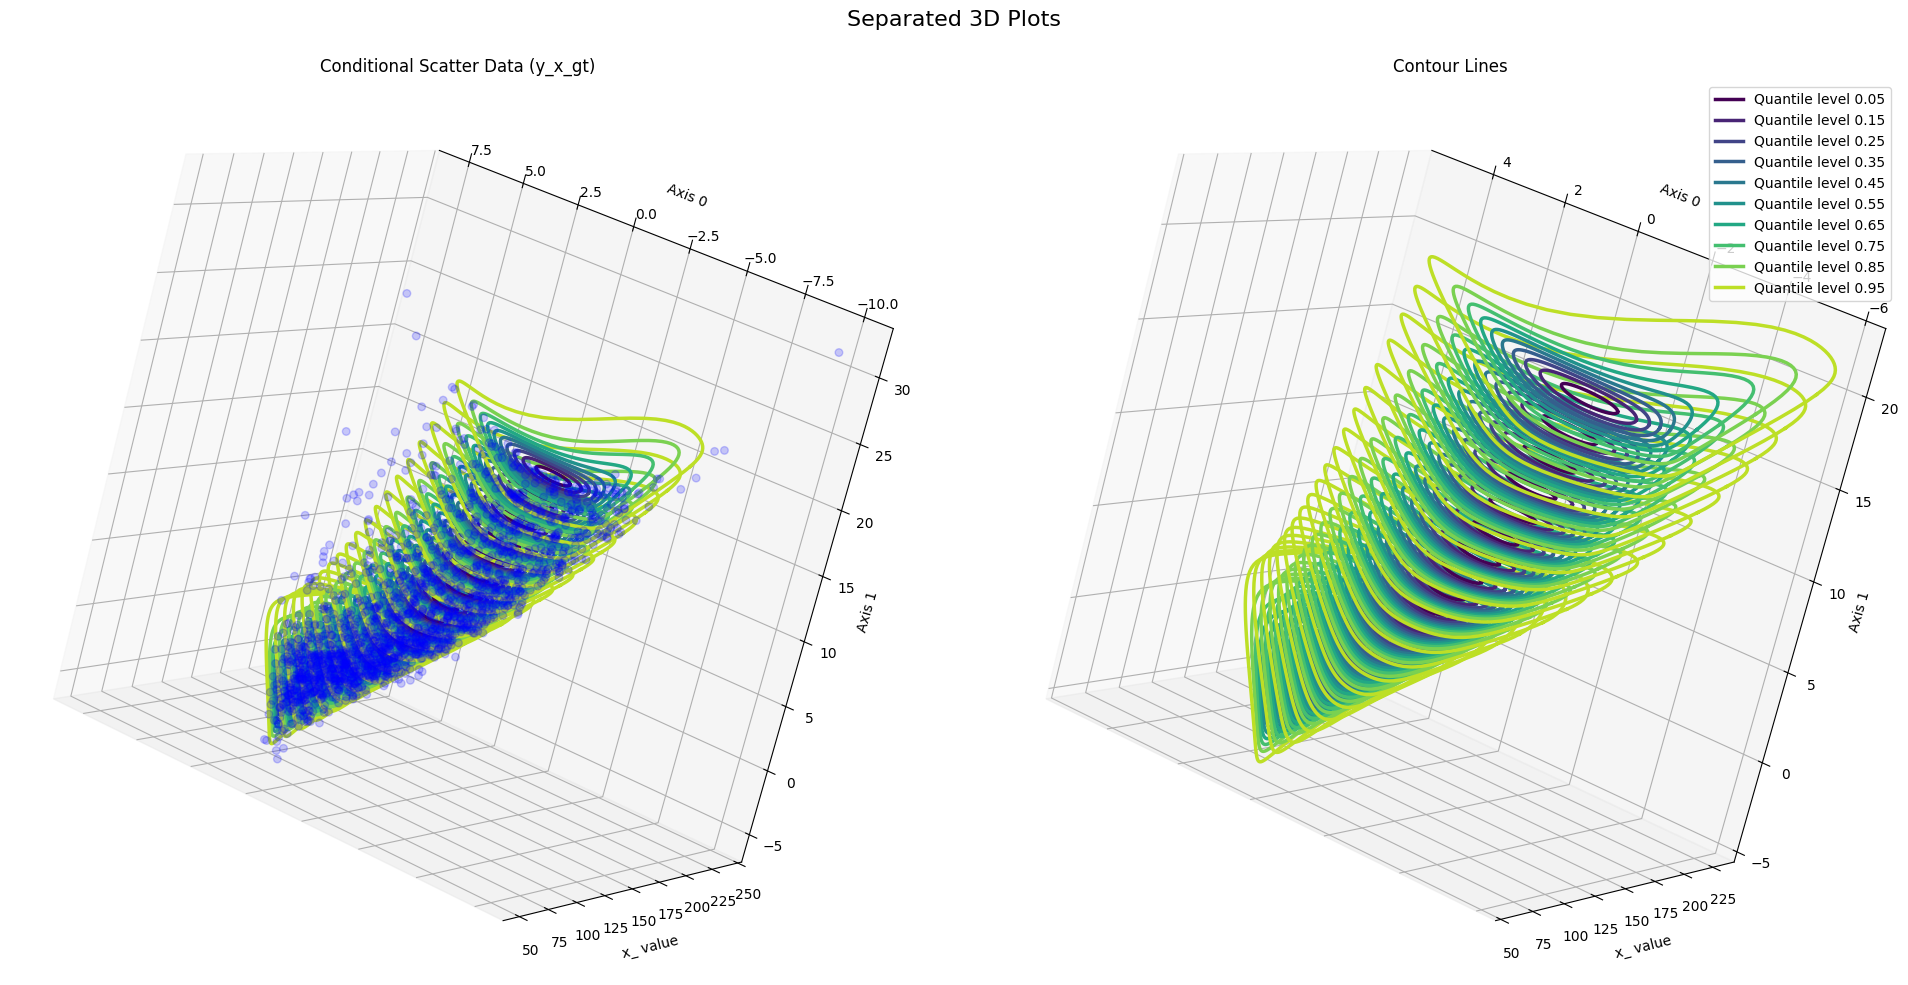

: 

In [ ]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

uotqr.eval()
plot_potentials_from_banana_dataset(model=uotqr, device_and_dtype_specifications=device_and_dtype_specifications)